# CIS 5450 Homework 2: SQL
## Due: Monday, September 30 2024, 11:59 PM EST
### Worth 100 points in total (90 Points Autograded + 10 Points Manually Graded)

Welcome to Homework 2! By now, you should be familiar with the world of data science and the Pandas library. This assignment focuses on helping you get to grips with a new tool: SQL.

Through this homework, we will be working with SQL (specifically **pandasql**) by exploring a [Yelp](https://www.kaggle.com/datasets/yelp-dataset/yelp-dataset/versions/6) dataset containing business, checkin, tip, and user data. We will also conduct some text analysis.

 <!-- We will finish off the homework with some text analysis. -->

We are introducing a lot of new things in this homework, and this is often where students start to get lost. Thus, we **strongly** encourage you to review the slides/material as you work through this assignment.

**Before you begin:**
- Be sure to click "Copy to Drive" to make sure you're working on your own personal version of the homework
- Check the **pinned FAQ post** on Ed for updates! If you have been stuck, chances are other students have also faced similar problems.
- **WARNING:** You MUST check that your notebook displays ALL visualizations on the Gradescope preview AND verify that the autograder finishes running and gives you your expected score (not a 0). (Ed [#251](https://edstem.org/us/courses/44790/discussion/3426442)).
  - **Penalty:** -10: if we have to resubmit your notebook to Gradescope for you after the deadline. (e.g. not naming your files correctly, not submitting `.py` and .`ipynb`, etc.).
  - **Penalty:** -5: failing to restart and re-run your notebook and ensure that that all visualizations show up in the Gradescope preview of your `.ipynb` (see step 1 and 2 in screenshot below for how to check this) (e.g. `Large File Hidden Error`).
  - **Note:** If your plot is not run or not present after we open your notebook, we will deduct the entire manually graded point value of the plot. (e.g. if your plot is worth 4 points, we will deduct 4 points).
  - **Note:** If your `.py` file is hidden because it's too large, that's ok! We only care about your `.ipynb` file.



## Part 0: Libraries and Set Up Jargon (The usual wall of imports)

In [ ]:
%set_env HW_ID=cis5450o_fall24_HW2

env: HW_ID=cis5450o_fall24_HW2


In [ ]:
%%capture
!pip install penngrader-client

In [ ]:
!pip install sqlalchemy==1.4.46
!pip install pandasql
!pip install geopy
!pip install -U kaleido
!pip install wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 34.7 MB/s eta 0:00:00
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 2.0.35
    Uninstalling SQLAlchemy-2.0.35:
      Successfully uninstalled SQLAlchemy-2.0.35
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython-sql 0.5.0 requires sqlalchemy>=2.0, but you have sqlalchemy 1.4.46 which is incompatible.
  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26772 sha256=dbb17a156b2c386845ab8b1453ca2d61568350ba487f49fd0d596570e0666cd7
  Stored in directory: /root/.cache/pip/wheels/e9/bc/3a/8434bdcccf5779e72894a9b24fecbdcaf97940607eaf4bcdf9
Successfully built pandasql
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.2 MB/s eta 0:00:00


In [ ]:
from penngrader.grader import *
import pandas as pd
import datetime as dt
import geopy.distance as gp
import matplotlib.image as mpimg
import plotly.express as px
import pandasql as ps #SQL on Pandas Dataframe
import nltk
nltk.download('punkt')

from wordcloud import WordCloud
from matplotlib.dates import date2num
import matplotlib.pyplot as plt
import math
import re
import json
import os
from collections import Counter
import random

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# Five datasets we're using
! wget -nc https://storage.googleapis.com/penn-cis5450/yelp_business.csv
! wget -nc https://storage.googleapis.com/penn-cis5450/yelp_checkin.csv
! wget -nc https://storage.googleapis.com/penn-cis5450/yelp_tip.csv
! wget -nc https://storage.googleapis.com/penn-cis5450/yelp_user.csv
! wget -nc https://storage.googleapis.com/penn-cis5450/hotel_reviews.csv

--2024-09-30 17:42:23--  https://storage.googleapis.com/penn-cis5450/yelp_business.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.179.207, 64.233.180.207, 142.251.16.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.179.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 31760674 (30M) [text/csv]
Saving to: ‘yelp_business.csv’

yelp_business.csv   100%[===================>]  30.29M   120MB/s    in 0.3s    

2024-09-30 17:42:24 (120 MB/s) - ‘yelp_business.csv’ saved [31760674/31760674]

--2024-09-30 17:42:24--  https://storage.googleapis.com/penn-cis5450/yelp_checkin.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.179.207, 64.233.180.207, 142.251.16.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.179.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 135964892 (130M) [text/csv]
Saving to: ‘yelp_checkin.csv’

yelp_checkin.csv 

In [ ]:
print(pd.__version__ )

2.1.4


### PennGrader Setup

In [ ]:
# PLEASE ENSURE YOUR PENN-ID IS ENTERED CORRECTLY.
# IF NOT, THE AUTOGRADER WON'T KNOW WHO TO ASSIGN POINTS TO YOU IN OUR BACKEND
# TODO: YOUR PENN-ID GOES HERE AS AN INTEGER
STUDENT_ID = 56803282

# You should also update this to a unique "secret" just for this homework, to
# authenticate this is YOUR submission
SECRET = STUDENT_ID

Leave this cell as-is...

In [ ]:
%%writefile notebook-config.yaml

grader_api_url: 'https://23whrwph9h.execute-api.us-east-1.amazonaws.com/default/Grader23'
grader_api_key: 'flfkE736fA6Z8GxMDJe2q8Kfk8UDqjsG3GVqOFOa'

Writing notebook-config.yaml


In [ ]:
grader = PennGrader('notebook-config.yaml', os.environ['HW_ID'], STUDENT_ID, SECRET)

PennGrader initialized with Student ID: 56803282

Make sure this correct or we will not be able to store your grade


# Yelp Dataset

<br>
<center><img src = "https://static-prod.adweek.com/wp-content/uploads/2021/08/YelpLogoAugust2021.jpg" width= "500" align ="center"/></center>
<br>



I'm sure you have used Yelp when searching for good restaurants or reliable local services, and with good reason. In this homework, we'll explore Yelp's extensive datasets to gain valuable insights into businesses and users on the platform. The data we will be using includes:

* Business: data about businesses listed on Yelp
* Check-in: data about check-ins made on businesses
* Tip: data about tips that users left for each business
* User: data about each user on Yelp including friends and number of reviews

We'll be parsing this data into dataframes and relations, and then exploring how to query and assemble the tables into results. We will primarily be using PandaSQL, but for some of the initial questions, we will ask you to perform the same operations in Pandas as well, so as to familiarize you with the differences and similarities of the two.

For the final part of this homework, we'll perform some text analysis on a hotel review dataset.

## Part 1: Load & Process our Datasets [12 points total]

Before we get into the data, we first need to load and clean our datasets.

# Metadata
You'll be working with four CSV files:
- `yelp_business.csv`
- `yelp_checkin.csv`
- `yelp_tip.csv`
- `yelp_user.csv`

The file `yelp_business.csv` contains data of businesses listed on Yelp such as name, address, stars, review count, etc.

The file `yelp_checkin.csv` contains check-in data for businesses including day, hour, and number of people.

The file `yelp_tip.csv` contains tips that each user left for each business.

The file `yelp_user.csv` contains data of each user such as name, review count, friends, start date of membership, and etc.


**TODO**:
* Load `yelp_business.csv` and save the data to a dataframe called `business_df`.
* Load `yelp_checkin.csv` and save the data to a dataframe called `checkin_df`.
* Load `yelp_tip.csv` and save the data to a dataframe called `tip_df`.
* Load `yelp_user.csv` and save the data to a dataframe called `user_df`.


In [ ]:
# TODO: Import the datasets to pandas dataframes -- make sure the dataframes are named correctly!
business_df = pd.read_csv('yelp_business.csv')
checkin_df = pd.read_csv('yelp_checkin.csv')
tip_df = pd.read_csv('yelp_tip.csv')
user_df = pd.read_csv('yelp_user.csv')

In [ ]:
# TODO: view business_df (just the first 5 rows with .head() is fine) to make sure the import was successful
business_df.head(5)

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",NaN,"""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,85044,33.330690,-111.978599,4.0,22,1,Dentists;General Dentistry;Health & Medical;Or...
1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""",NaN,"""3101 Washington Rd""",McMurray,PA,15317,40.291685,-80.104900,3.0,11,1,Hair Stylists;Hair Salons;Men's Hair Salons;Bl...
2,KQPW8lFf1y5BT2MxiSZ3QA,"""Western Motor Vehicle""",NaN,"""6025 N 27th Ave, Ste 1""",Phoenix,AZ,85017,33.524903,-112.115310,1.5,18,1,Departments of Motor Vehicles;Public Services ...
3,8DShNS-LuFqpEWIp0HxijA,"""Sports Authority""",NaN,"""5000 Arizona Mills Cr, Ste 435""",Tempe,AZ,85282,33.383147,-111.964725,3.0,9,0,Sporting Goods;Shopping
4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",NaN,"""581 Howe Ave""",Cuyahoga Falls,OH,44221,41.119535,-81.475690,3.5,116,1,American (New);Nightlife;Bars;Sandwiches;Ameri...


In [ ]:
# TODO: view checkin_df (just the first 5 rows with .head() is fine) to make sure the import was successful
checkin_df.head(5)

,business_id,weekday,hour,checkins
0,3Mc-LxcqeguOXOVT_2ZtCg,Tue,0:00,12
1,SVFx6_epO22bZTZnKwlX7g,Wed,0:00,4
2,vW9aLivd4-IorAfStzsHww,Tue,14:00,1
3,tEzxhauTQddACyqdJ0OPEQ,Fri,19:00,1
4,CEyZU32P-vtMhgqRCaXzMA,Tue,17:00,1


In [ ]:
# TODO: view tip_df (just the first 5 rows with .head() is fine) to make sure the import was successful
tip_df.head(5)

,text,date,likes,business_id,user_id
0,Great breakfast large portions and friendly wa...,2015-08-12,0,jH19V2I9fIslnNhDzPmdkA,ZcLKXikTHYOnYt5VYRO5sg
1,Nice place. Great staff. A fixture in the tow...,2014-06-20,0,dAa0hB2yrnHzVmsCkN4YvQ,oaYhjqBbh18ZhU0bpyzSuw
2,Happy hour 5-7 Monday - Friday,2016-10-12,0,dAa0hB2yrnHzVmsCkN4YvQ,ulQ8Nyj7jCUR8M83SUMoRQ
3,"Parking is a premium, keep circling, you will ...",2017-01-28,0,ESzO3Av0b1_TzKOiqzbQYQ,ulQ8Nyj7jCUR8M83SUMoRQ
4,Homemade pasta is the best in the area,2017-02-25,0,k7WRPbDd7rztjHcGGkEjlw,ulQ8Nyj7jCUR8M83SUMoRQ


In [ ]:
# TODO: view user_df (just the first 5 rows with .head() is fine) to make sure the import was successful
user_df.head(5)

,user_id,name,review_count,yelping_since,friends,useful,funny,cool,fans,elite,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,JJ-aSuM4pCFPdkfoZ34q0Q,Chris,10,2013-09-24,"0njfJmB-7n84DlIgUByCNw, rFn3Xe3RqHxRSxWOU19Gpg...",0,0,0,0,NaN,...,0,0,0,0,0,0,0,0,0,0
1,uUzsFQn_6cXDh6rPNGbIFA,Tiffy,1,2017-03-02,NaN,0,0,0,0,NaN,...,0,0,0,0,0,0,0,0,0,0
2,mBneaEEH5EMyxaVyqS-72A,Mark,6,2015-03-13,NaN,0,0,0,0,NaN,...,0,0,0,0,0,0,0,0,0,0
3,W5mJGs-dcDWRGEhAzUYtoA,Evelyn,3,2016-09-08,NaN,0,0,0,0,NaN,...,0,0,0,0,0,0,0,0,0,0
4,4E8--zUZO1Rr1IBK4_83fg,Lisa,11,2012-07-16,NaN,4,0,0,0,NaN,...,0,0,0,0,0,0,0,0,1,0


### 1.1 Data Preprocessing

Next, we are going to want to clean up our dataframes. We will start with cleaning up `business_df`.

#### 1.1.1 Cleaning `business_df` [4 points]

`.info()` gives us meaningful information regarding columns, their types, and the amount of nulls, based on which we can now clean our dataframe.

Perform these steps and save results on a new dataframe: `business_cleaned_df`

**TODO**:
* Copy `business_df` to the new dataframe called `business_cleaned_df`
* Remove extra quotation marks from the entries in the columns `name` and `address` in `business_cleaned_df`
* Format column categories such that each row is a list of strings
* Drop `neighborhood` column from `business_cleaned_df`
* Create a column called `is_restaurant` where the value is 1 if `'Restaurants'` is in the list in column `categories` and is 0 otherwise
* Create individual rows for each category of each business instead of having a list of categories (Hint: explode)
* Sort `business_cleaned_df` by `business_id` and `categories` respectively in an ascending order and reset index as well as drop old indices
* Create a list called `business_category_list` containing all unique values found in column `categories` and sort the list in an alphabetical order

After performing these steps, `business_cleaned_df` should have the following schema:

**Final Schema**:
>business_id | name | address | city | state | postal_code | latitude | longitude | stars | review_count | is_open | categories | is_restaurant
>--- | --- | --- |--- | --- | --- | --- |--- | --- | --- |--- |--- |---

### **NOTES: MAKE SURE TO ALWAYS RESET INDEX. OTHERWISE, YOU MIGHT GET AN INTERNAL SERVER ERROR WHEN RUNNING THE TEST CASES!!!**

In [ ]:
# View info of business_df
business_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174567 entries, 0 to 174566
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   174567 non-null  object 
 1   name          174567 non-null  object 
 2   neighborhood  68015 non-null   object 
 3   address       174567 non-null  object 
 4   city          174566 non-null  object 
 5   state         174566 non-null  object 
 6   postal_code   173944 non-null  object 
 7   latitude      174566 non-null  float64
 8   longitude     174566 non-null  float64
 9   stars         174567 non-null  float64
 10  review_count  174567 non-null  int64  
 11  is_open       174567 non-null  int64  
 12  categories    174567 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 17.3+ MB


In [ ]:
# TODO: Save business_df to business_cleaned_df
business_cleaned_df = business_df.copy()

In [ ]:
 # TODO: Remove extra quotations (“”) from name and address
business_cleaned_df['name'] = business_cleaned_df['name'].str.replace('"', '')
business_cleaned_df['address'] = business_cleaned_df['address'].str.replace('"', '')


In [ ]:
# TODO: Format column categories such that each row is a list of strings
business_cleaned_df['categories'] = business_cleaned_df['categories'].apply(lambda x: x.split(';'))

In [ ]:
# TODO: Drop neighborhood column
business_cleaned_df = business_cleaned_df.drop(columns=['neighborhood'])

In [ ]:
# TODO: Create a column called is_restaurant where the value is 1 if 'Restaurants' is within the list in the column categories and is 0 otherwise
business_cleaned_df['is_restaurant'] = business_cleaned_df['categories'].apply(lambda x: 1 if 'Restaurants' in x else 0)

In [ ]:
# TODO: Create individual rows for each category of each business (Hint: explode)
business_cleaned_df = business_cleaned_df.explode('categories')

In [ ]:
# TODO: Sort business_id and categories by ascending order
business_cleaned_df = business_cleaned_df.sort_values(by=['business_id', 'categories'], ascending=[True, True]).reset_index()

In [ ]:
# TODO: Create a list called business_category_list containing all unique values found in column categories and sort the list in an alphabetical order
business_category_list = business_cleaned_df['categories'].unique()
business_category_list.sort()

In [ ]:
# 4 points
grader.grade(test_case_id = 'test_cleaning_business', answer = (len(business_category_list), business_cleaned_df.head(5)))

Correct! You earned 4/4 points. You are a star!

Your submission has been successfully recorded in the gradebook.


#### 1.1.2 Inspecting `checkin_df` [3 points]

We will inspect `checkin_df` through the following steps:

**TODO**:
* Save `checkin_df` to the new dataframe called `checkin_cleaned_df`
* Inspect the values in `weekday` column. Store the number of unique values for the column `weekday` in the variable called `weekday_count_checkin`
* Inspect the values in `hour` column. Store the number of unique values for the column `hour` in the variable called `hour_count_checkin`
* We would like to know the maximum number of total check-ins received by a business in the dataframe (the largest number of check-ins among all businesses). Store this value in the variable called `max_checkin_single`

After performing these steps, `checkin_cleaned_df` should have the following schema (should be the same as `checkin_df`):

**Final Schema**:
>business_id | weekday | hour | checkins
>--- | --- | --- |---

In [ ]:
# View info of checkin_df
checkin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3911218 entries, 0 to 3911217
Data columns (total 4 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   business_id  object
 1   weekday      object
 2   hour         object
 3   checkins     int64 
dtypes: int64(1), object(3)
memory usage: 119.4+ MB


In [ ]:
# TODO: Save checkin_df to checkin_cleaned_df
checkin_cleaned_df = checkin_df.copy()

In [ ]:
# TODO: Store the number of unique values for the column weekday in the variable called weekday_count_checkin
weekday_count_checkin = checkin_cleaned_df['weekday'].nunique()

In [ ]:
# TODO: Store the number of unique values for the column hour in the variable called hour_count_checkin
hour_count_checkin = checkin_cleaned_df['hour'].nunique()

In [ ]:
checkin_cleaned_df = checkin_cleaned_df.groupby(['business_id']).agg({'checkins': 'sum'}).reset_index()
checkin_cleaned_df

,business_id,checkins
0,--6MefnULPED_I942VcFNA,139
1,--7zmmkVg-IMGaXbuVd0SQ,153
2,--8LPVSo5i0Oo61X01sV9A,1
3,--9QQLMTbFzLJ_oT-ON3Xw,33
4,--9e1ONYQuAa-CB_Rrw7Tw,2568
...,...,...
146345,zzvlwkcNR1CCqOPXwuvz2A,2
146346,zzwaS0xn1MVEPEf0hNLjew,716
146347,zzwhN7x37nyjP0ZM8oiHmw,33
146348,zzwicjPC9g246MK2M1ZFBA,127


In [ ]:
# TODO: Store the maximum number of total check-ins for a single business in the variable called max_checkin_single
max_checkin_single = checkin_cleaned_df['checkins'].max()

In [ ]:
# 3 points
grader.grade(test_case_id = 'test_cleaning_checkin', answer = (weekday_count_checkin, hour_count_checkin, max_checkin_single))

Correct! You earned 3/3 points. You are a star!

Your submission has been successfully recorded in the gradebook.


#### 1.1.3 Cleaning `tip_df` [2 points]

We will clean `tip_df` through the following steps:

**TODO**:
* Save `tip_df` to the new dataframe called `tip_cleaned_df`
* Drop all rows with NA
* Convert the data type in `date` column from string to `datetime64[ns]` (Use default format: `'%Y-%m-%d'`)
* Sort `tip_cleaned_df` by `business_id` and `user_id` in an ascending order and reset index

After performing these steps, `tip_cleaned_df` should have the following schema (should be the same as `tip_df`):

**Final Schema**:
>text | date | likes | business_id | user_id
>--- | --- | --- |--- |---

In [ ]:
# View info of tip_df
tip_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1098324 entries, 0 to 1098323
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   text         1098319 non-null  object
 1   date         1098324 non-null  object
 2   likes        1098324 non-null  int64 
 3   business_id  1098324 non-null  object
 4   user_id      1098324 non-null  object
dtypes: int64(1), object(4)
memory usage: 41.9+ MB


In [ ]:
# TODO: Save tip_df to tip_cleaned_df
tip_cleaned_df = tip_df.copy()

In [ ]:
# TODO: Drop rows with NA
tip_cleaned_df = tip_cleaned_df.dropna()

In [ ]:
# TODO: Convert the data in date column from string to datetime64[ns]
tip_cleaned_df = tip_cleaned_df.astype({'date': 'datetime64[ns]'})
tip_cleaned_df

,text,date,likes,business_id,user_id
0,Great breakfast large portions and friendly wa...,2015-08-12,0,jH19V2I9fIslnNhDzPmdkA,ZcLKXikTHYOnYt5VYRO5sg
1,Nice place. Great staff. A fixture in the tow...,2014-06-20,0,dAa0hB2yrnHzVmsCkN4YvQ,oaYhjqBbh18ZhU0bpyzSuw
2,Happy hour 5-7 Monday - Friday,2016-10-12,0,dAa0hB2yrnHzVmsCkN4YvQ,ulQ8Nyj7jCUR8M83SUMoRQ
3,"Parking is a premium, keep circling, you will ...",2017-01-28,0,ESzO3Av0b1_TzKOiqzbQYQ,ulQ8Nyj7jCUR8M83SUMoRQ
4,Homemade pasta is the best in the area,2017-02-25,0,k7WRPbDd7rztjHcGGkEjlw,ulQ8Nyj7jCUR8M83SUMoRQ
...,...,...,...,...,...
1098319,Awesome food great live entertainment,2017-12-03,0,AR0b2PPSBfl8SRUGx-QCmA,A9WQWLL7mN6cwOklTcbppg
1098320,Amazing! Great food and prices. Upgrade to the...,2017-12-04,0,Cs8YvyehNELsgOsf5Us4Dg,FcWOFsW8dvG5BHTB_ZPyhg
1098321,Great new place. Staff was very friendly and h...,2017-12-05,0,RWwcoU716D8j519RL7paVA,bQxvo4r6y6HImAJZShR3Eg
1098322,"We waited 1.5 hour for the food, asked multipl...",2017-12-08,0,ZqTXN4qh0Ta1Lp8Z3v-dKg,kA6L6nrjJnu1bfkLGN8l9Q


In [ ]:
# TODO: Sort tip_cleaned_df by business_id in an ascending order and reset index
tip_cleaned_df = tip_cleaned_df.sort_values(by=['business_id', 'user_id'], ascending=[True, True]).reset_index(drop=True)


In [ ]:
tip_cleaned_df

,text,date,likes,business_id,user_id
0,"$7.50 lunch special, dish of rice\/noodles wit...",2017-01-15,0,--6MefnULPED_I942VcFNA,0cUzu82KJiE5_xZA0Iu3ZQ
1,$5 lunch special,2014-07-11,0,--6MefnULPED_I942VcFNA,2oMkzQcRL7-d7URt3Xo_Xg
2,$6 lunch special. A lot of selection on the lu...,2015-02-19,0,--6MefnULPED_I942VcFNA,3yMtpQ_wV4ZGg6E69uE1PQ
3,"Combo A: Roast duck, roast pork, Singapore noo...",2015-10-12,0,--6MefnULPED_I942VcFNA,6tbXpUIU6upoeqWNDo9k_A
4,Make reservation on weekend,2013-01-27,0,--6MefnULPED_I942VcFNA,CxDOIDnH8gp9KXzpBHJYXw
...,...,...,...,...,...
1098314,"Good fingers ad cheaper than other places, hot...",2013-06-16,0,zzzaIBwimxVej4tY6qFOUQ,uqcM00Kf4Nr23PmS-VIR5g
1098315,Hot and fresh!,2013-10-18,0,zzzaIBwimxVej4tY6qFOUQ,vAkpKtEvDxxavhva_vAIxw
1098316,"Best fried chicken I've ever eaten! Great, fri...",2013-10-18,0,zzzaIBwimxVej4tY6qFOUQ,vAkpKtEvDxxavhva_vAIxw
1098317,Knock off raising canes... Place sucks!,2013-01-07,0,zzzaIBwimxVej4tY6qFOUQ,w7Q-WMxPuznP-P2Y79ICng


In [ ]:
# 2 points
grader.grade(test_case_id = 'test_cleaning_tip', answer = (tip_cleaned_df.head(5), len(tip_cleaned_df)))

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


#### 1.1.4 Cleaning `user_df` [3 points]

To understand what each column means, please refer to [this documentation](https://www.yelp.com/dataset/documentation/main) (Note that the original datasets were in JSON format).

Perform these steps and save results on a new dataframe: `user_cleaned_df`

**TODO**:
* Save `user_df` to the new dataframe called `user_cleaned_df`
* Create a column called `has_friend` which contains a value of 1 if the user has at least 1 friends and contains a value of 0 otherwise
* Drop unwanted columns so we only have the following columns in `user_cleaned_df`: `user_id, name, review_count, yelping_since, friends, elite, average_stars, has_friend`
* Sort `user_cleaned_df` by `user_id` in an ascending order and reset index

After performing these steps, `user_cleaned_df` should have the following schema:

**Final Schema**:
>user_id | name | review_count | yelping_since | friends | elite | average_stars | has_friend
>--- | --- | --- |--- | --- | --- |--- |---


**Notes:**
* Do not convert the `friends` column into a list of strings since the table is very large, and performing such an operation could lead to a depletion of your RAM. We will address this column later, but only on a smaller subset of the table.
* `'friends'` column is of type string, and `'None'` should not be interpreted as `NA` but rather a string `'None'`

In [ ]:
# View info of user_df
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1326100 entries, 0 to 1326099
Data columns (total 22 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   user_id             1326100 non-null  object 
 1   name                1325585 non-null  object 
 2   review_count        1326100 non-null  int64  
 3   yelping_since       1326100 non-null  object 
 4   friends             760007 non-null   object 
 5   useful              1326100 non-null  int64  
 6   funny               1326100 non-null  int64  
 7   cool                1326100 non-null  int64  
 8   fans                1326100 non-null  int64  
 9   elite               60818 non-null    object 
 10  average_stars       1326100 non-null  float64
 11  compliment_hot      1326100 non-null  int64  
 12  compliment_more     1326100 non-null  int64  
 13  compliment_profile  1326100 non-null  int64  
 14  compliment_cute     1326100 non-null  int64  
 15  compliment_list

In [ ]:
# TODO: Save user_df to user_cleaned_df
user_cleaned_df = user_df.copy()
user_cleaned_df

,user_id,name,review_count,yelping_since,friends,useful,funny,cool,fans,elite,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,JJ-aSuM4pCFPdkfoZ34q0Q,Chris,10,2013-09-24,"0njfJmB-7n84DlIgUByCNw, rFn3Xe3RqHxRSxWOU19Gpg...",0,0,0,0,NaN,...,0,0,0,0,0,0,0,0,0,0
1,uUzsFQn_6cXDh6rPNGbIFA,Tiffy,1,2017-03-02,NaN,0,0,0,0,NaN,...,0,0,0,0,0,0,0,0,0,0
2,mBneaEEH5EMyxaVyqS-72A,Mark,6,2015-03-13,NaN,0,0,0,0,NaN,...,0,0,0,0,0,0,0,0,0,0
3,W5mJGs-dcDWRGEhAzUYtoA,Evelyn,3,2016-09-08,NaN,0,0,0,0,NaN,...,0,0,0,0,0,0,0,0,0,0
4,4E8--zUZO1Rr1IBK4_83fg,Lisa,11,2012-07-16,NaN,4,0,0,0,NaN,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1326095,LODBIwiAcKxRi7Wz-sFsKw,Neth,1,2015-02-21,NaN,0,0,0,0,NaN,...,0,0,0,0,0,0,0,0,0,0
1326096,JpY2ozlb30z_AZCq2YX34g,Mike,1,2014-08-01,NaN,2,0,0,0,NaN,...,0,0,0,0,0,0,0,0,0,1
1326097,AU9aZSA1rAjNE5cFcZTVMA,Jalin,12,2015-11-11,NaN,0,0,0,0,NaN,...,0,0,0,0,0,0,0,0,0,0
1326098,s1BZ7-rpqb3xRKcxvArXsQ,Cindy,33,2014-06-28,NaN,5,0,0,0,NaN,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
# TODO: Create a column called has_friend which contains a value of 1 if the user has friends and 0 otherwise
user_cleaned_df['has_friend'] = user_cleaned_df['friends'].apply(lambda x: 1 if x != 'None' else 0)
user_cleaned_df

,user_id,name,review_count,yelping_since,friends,useful,funny,cool,fans,elite,...,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,has_friend
0,JJ-aSuM4pCFPdkfoZ34q0Q,Chris,10,2013-09-24,"0njfJmB-7n84DlIgUByCNw, rFn3Xe3RqHxRSxWOU19Gpg...",0,0,0,0,NaN,...,0,0,0,0,0,0,0,0,0,1
1,uUzsFQn_6cXDh6rPNGbIFA,Tiffy,1,2017-03-02,NaN,0,0,0,0,NaN,...,0,0,0,0,0,0,0,0,0,1
2,mBneaEEH5EMyxaVyqS-72A,Mark,6,2015-03-13,NaN,0,0,0,0,NaN,...,0,0,0,0,0,0,0,0,0,1
3,W5mJGs-dcDWRGEhAzUYtoA,Evelyn,3,2016-09-08,NaN,0,0,0,0,NaN,...,0,0,0,0,0,0,0,0,0,1
4,4E8--zUZO1Rr1IBK4_83fg,Lisa,11,2012-07-16,NaN,4,0,0,0,NaN,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1326095,LODBIwiAcKxRi7Wz-sFsKw,Neth,1,2015-02-21,NaN,0,0,0,0,NaN,...,0,0,0,0,0,0,0,0,0,1
1326096,JpY2ozlb30z_AZCq2YX34g,Mike,1,2014-08-01,NaN,2,0,0,0,NaN,...,0,0,0,0,0,0,0,0,1,1
1326097,AU9aZSA1rAjNE5cFcZTVMA,Jalin,12,2015-11-11,NaN,0,0,0,0,NaN,...,0,0,0,0,0,0,0,0,0,1
1326098,s1BZ7-rpqb3xRKcxvArXsQ,Cindy,33,2014-06-28,NaN,5,0,0,0,NaN,...,0,0,0,0,1,0,0,0,0,1


In [ ]:
# TODO: Drop unwanted columns
user_cleaned_df = user_cleaned_df[['user_id', 'name', 'review_count', 'yelping_since', 'has_friend', 'friends', 'elite', 'average_stars']]


In [ ]:
user_cleaned_df

,user_id,name,review_count,yelping_since,has_friend,friends,elite,average_stars
0,JJ-aSuM4pCFPdkfoZ34q0Q,Chris,10,2013-09-24,1,"0njfJmB-7n84DlIgUByCNw, rFn3Xe3RqHxRSxWOU19Gpg...",NaN,3.70
1,uUzsFQn_6cXDh6rPNGbIFA,Tiffy,1,2017-03-02,1,NaN,NaN,2.00
2,mBneaEEH5EMyxaVyqS-72A,Mark,6,2015-03-13,1,NaN,NaN,4.67
3,W5mJGs-dcDWRGEhAzUYtoA,Evelyn,3,2016-09-08,1,NaN,NaN,4.67
4,4E8--zUZO1Rr1IBK4_83fg,Lisa,11,2012-07-16,1,NaN,NaN,3.45
...,...,...,...,...,...,...,...,...
1326095,LODBIwiAcKxRi7Wz-sFsKw,Neth,1,2015-02-21,1,NaN,NaN,5.00
1326096,JpY2ozlb30z_AZCq2YX34g,Mike,1,2014-08-01,1,NaN,NaN,5.00
1326097,AU9aZSA1rAjNE5cFcZTVMA,Jalin,12,2015-11-11,1,NaN,NaN,1.85
1326098,s1BZ7-rpqb3xRKcxvArXsQ,Cindy,33,2014-06-28,1,NaN,NaN,3.97


In [ ]:
# TODO: Sort by user_id in an ascending order
user_cleaned_df = user_cleaned_df.sort_values(by=['user_id'], ascending=[True]).reset_index(drop=True)

In [ ]:
# 3 points
grader.grade(test_case_id = 'test_cleaning_user', answer = (user_cleaned_df.head(5), len(user_cleaned_df)))

Correct! You earned 3/3 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### 1.2 Your Sandbox

`.info()` is just one of many basic tools that you can use for Exploratory Data Analysis (EDA). Instead of throwing you straight into the deep end, we wanted to give you a chance to take some time and explore the data on your own. **This section is not graded**, so for the speedrunners out there feel free to just jump in, but we wanted to at least give you a small space to utilize your EDA toolkit to familiarize yourself with all the data you just downloaded.

Some suggestions to get you started:
- `df.head()`
- `df.describe()`
- `Series.unique()`

In [ ]:
# Your EDA here! Feel free to add more cells
business_cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668027 entries, 0 to 668026
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   index          668027 non-null  int64  
 1   business_id    668027 non-null  object 
 2   name           668027 non-null  object 
 3   address        668027 non-null  object 
 4   city           668023 non-null  object 
 5   state          668023 non-null  object 
 6   postal_code    666055 non-null  object 
 7   latitude       668024 non-null  float64
 8   longitude      668024 non-null  float64
 9   stars          668027 non-null  float64
 10  review_count   668027 non-null  int64  
 11  is_open        668027 non-null  int64  
 12  categories     668027 non-null  object 
 13  is_restaurant  668027 non-null  int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 71.4+ MB


## Part 2: Exploring the Data with PandasSQL (and Pandas) [74 points total]

Now that you are familiar (or still unfamiliar) with the dataset, we will now introduce you to SQL, or more specifically **pandasql**: a package created to allow users to query pandas DataFrames with SQL statements.

**Notes: Please note that in this part, the questions are not necessarily ordered by increasing difficulty, i.e., the first question may not necessarily be the easiest, and the difficulty level may vary.**

## 👇👇👇 IMPORTANT: Pay VERY CLOSE attention to this style guide! 👇👇👇

The typical flow to use pandasql (aliased as `ps`) is as follows:
1. Write a SQL query in the form of a string
    - **String Syntax:** use triple quotes `"""<your query>"""` to write multi-line strings
    - **Aliases are your friend:** if there are very long table names or you find yourself needed to declare the source (common during join tasks), it's almost always optimal to alias your tables with short INTUITIVE alias names
    - **New Clauses New Line:** each of the main SQL clauses (`SELECT`, `FROM`, `WHERE`, etc.) should begin on a new line
    - **Use Indentation:** if there are many components for a single clause, separate them out with new <ins>indented</ins> lines.

    Example below:
    ```SQL
    """
    SELECT ltn.some_id, SUM(stn.some_value) AS total
    FROM long_table_name AS ltn
         INNER JOIN short_table_name AS stn
            ON ltn.common_key = stn.common_key
         INNER JOIN med_table_name AS mtn
            ON ltn.other_key = mtn.other_key
    WHERE ltn.col1 > value
         AND stn.col2 <= another_value
         AND mtn.col3 != something_else
    GROUP BY ltn.some_id
    ORDER BY total
    """
    ```
2. Run the query using **ps.sqldf(your_query, locals())**

Pandasql is convenient in that it allows you to reference the dataframes that are currently defined in your notebook, so you will be able to fully utilize the dataframes that you have created above!

Given that it is a brand new language, we wanted to give you a chance to directly compare the similarities/differences of the pandas that you already know and the SQL that you are about to learn. Thus, for each of the simpler queries, we may ask that you **look into the question twice: once with pandas and once with pandasql**. The SQL queries may take a minute to run, don't worry that is normal!

### 2.1 Location, Location, Location [22 points]

In the world of real estate, the phrase "location, location, location" has long been a mantra, emphasizing the importance of where a property is situated. Surprisingly, this mantra holds true not just for real estate but also for the culinary world. When it comes to restaurants, location can make or break a business. In this analysis, we're going to take a deep dive into the intersection of restaurants and their locations.

#### 2.1.1 What are the cities with the most restaurants? [6 points]

The dataframe `business_cleaned_df` contains information of each business. We want to know the top 10 cities with the most restaurants. Note that we can distinguish restaurants by their `business_id`.

**TODO:**

* Use `pandas` to find top 10 cities in the `city` and `state` column with the most restaurants. Note that you should also include `state` in groupby since city names could repeat, i.e., `city` together with `state` are unique
* Include average stars of restaurants in each city in the column called `average_stars`
* Order the resulting dataframe by the total number of restaurants, `restaurant_count`, in descending order
* Save the result as `most_res_df` and don't forget to reset index

**Final Schema**:
>city | state | restaurant_count | average_stars
>--- | --- | --- |---

**Hint:**
* There are two indicators whether the business is a restaurant or not:
    * `is_restaurant` equals `1`
    * `categories` equals `'Restaurants'`
* Think about how we cleaned `business_df` to figure out the best way to filter the restaurants! (Think about what explode, where we Hinted about using it, does, and whether the way you decide on results in counting duplicates)

In [ ]:
# TODO: Use pandas to find top 10 cities (including state) with the most restaurants. Also include average stars
business_cleaned_df_restaurant = business_cleaned_df[(business_cleaned_df['is_restaurant'] == 1) & (business_cleaned_df['categories'] == 'Restaurants')]
business_cleaned_df_top_10 = business_cleaned_df_restaurant.groupby(['city', 'state']).agg({'business_id': 'count', 'stars': 'mean'}).reset_index()
most_res_df = business_cleaned_df_top_10.sort_values(by=['business_id'], ascending=[False]).reset_index(drop=True)
most_res_df = most_res_df.rename(columns={'business_id': 'restaurant_count', 'stars': 'average_stars'})
most_res_df = most_res_df.head(10)

In [ ]:
# 3 points
grader.grade(test_case_id = 'most_res_pd', answer = most_res_df)

Correct! You earned 3/3 points. You are a star!

Your submission has been successfully recorded in the gradebook.


**TODO:**
* Now, use `pandasql` to find top 10 cities with the most restaurants
* The result should be saved as `most_res_df_sql` and should be the same as the result from `pandas`

**WARNING: DO NOT USE PANDAS FOR ALL SQL QUESTIONS! OTHERWISE, YOU WON'T RECEIVE CREDITS FOR ALL SQL QUESTIONS**

In [ ]:
# TODO: Use SQL to find top 10 cities (including state) with the most restaurants. Also include average stars
most_res_query = '''SELECT city, state, count(business_id) as restaurant_count, avg(stars) as average_stars
                    FROM business_cleaned_df
                    WHERE is_restaurant = 1 AND categories = 'Restaurants'
                    GROUP BY city, state
                    ORDER BY restaurant_count desc
'''
most_res_df_sql = ps.sqldf(most_res_query, locals())
most_res_df_sql = most_res_df_sql.head(10)

In [ ]:
# 3 points
grader.grade(test_case_id = 'most_res_sql', answer = (most_res_df_sql, most_res_query))

Correct! You earned 3/3 points. You are a star!

Your submission has been successfully recorded in the gradebook.


#### 2.1.2 Which cities have the highest average total check-ins per restaurant? [8 points]

The dataframe `checkin_cleaned_df` contains check-in information for each business. We want to know the top 15 cities with the highest average check-ins per restaurant.

**TODO:**

* Use `pandas` to find top 15 cities in the `city` and `state` column with the highest average check-ins per restaurant. Note that you should also include `state` in groupby since city names could repeat, i.e., `city` together with `state` are unique
* Include average check-ins per restaurant in each city in the column called `avg_checkins`. Round the average check-ins to 1 decimal place
* Order the resulting dataframe by `avg_checkins` in descending order
* Save the result as `most_checkin_df` and don't forget to reset index

**Notes:**
* Only consider businesses with check-in data in `checkin_cleaned_df`. Do not include businesses with no check-in data in the average.
* One `business_id` can appear in more than one row in `business_cleaned_df` and `checkin_cleaned_df`. Think about how we can filter restaurants from other types of business without taking duplicates.

**Final Schema**:
>city | state | avg_checkins
>--- | --- | ---

In [ ]:
# TODO: Use pandas to find 15 cities (including state) with highest average total checkins per restaurant
checkin_cleaned_df_restaurant = business_cleaned_df[(business_cleaned_df['is_restaurant'] == 1) & (business_cleaned_df['categories'] == 'Restaurants')]
checkin_cleaned_df_restaurant = checkin_cleaned_df_restaurant.merge(checkin_cleaned_df, on='business_id', how='inner')
most_checkin_df = checkin_cleaned_df_restaurant.groupby(['city', 'state']).agg({'checkins': 'mean'}).reset_index()
most_checkin_df = most_checkin_df.sort_values(by=['checkins'], ascending=[False]).reset_index(drop=True)
most_checkin_df = most_checkin_df.rename(columns={'checkins': 'avg_checkins'})
most_checkin_df = most_checkin_df.head(15)

In [ ]:
# 4 points
grader.grade(test_case_id = 'most_checkin_pd', answer = most_checkin_df)

Correct! You earned 4/4 points. You are a star!

Your submission has been successfully recorded in the gradebook.


**TODO:**
* Now, use `pandasql` to find top 15 cities with the highest average total check-ins per restaurant
* The result should be saved as `most_res_df_sql` and should be the same as the result from `pandas`

In [ ]:
# TODO: Use SQL to find 15 cities (including state) with highest average total checkins per restaurant
most_checkin_query = '''SELECT city, state, avg(checkins) as avg_checkins
                        FROM business_cleaned_df
                          INNER JOIN checkin_cleaned_df
                            ON business_cleaned_df.business_id = checkin_cleaned_df.business_id
                        WHERE is_restaurant = 1 AND categories = 'Restaurants'
                        GROUP BY city, state
                        ORDER BY avg_checkins desc
'''
most_checkin_df_sql = ps.sqldf(most_checkin_query, locals())
most_checkin_df_sql = most_checkin_df_sql.head(15)

In [ ]:
# 4 points
grader.grade(test_case_id = 'most_checkin_sql', answer = (most_checkin_df_sql, most_checkin_query))

Correct! You earned 4/4 points. You are a star!

Your submission has been successfully recorded in the gradebook.


#### 2.1.3 Which states have the most popular Thai restaurants? [8 points]
We would like to know which state has the most popular Thai restaurants, which we will gauge using the number of reviews.

**TODO:**
* Use `business_cleaned_df` to find Thai restaurants with the highest `review_count` for each state
* The resulting dataframe should include the `state` and `city` in which the restaurant is located, the `name` of the restaurant, the number of reviews in the `max_review` column, and the `stars` of the restaurant
* If there are more than one Thai restaurants in the same state with the maximum number of reviews, include all of them in the resulting dataframe
* Save the result as `popular_thai_df` and don't forget to reset index
* Finally, order the resulting dataframe by `max_review` in a descending order and `name` in an ascending order respectively
* Hint: Make sure you are only considering restaurants

**Final Schema**:
>state | city | name | max_review | stars
>--- | --- | --- | --- | ---

Filter the data to Thai restaurant first using business_cleaned_df

2. Based on step 1, group by state to get the max review counts

3. Merge the output of step 2 with the output of step 1 to find the rows with max review counts

In [ ]:
# TODO: Use pandas to find Thai restaurants with highest review count for each state
thai_df = business_cleaned_df[(business_cleaned_df['categories'] == 'Thai') & (business_cleaned_df['is_restaurant'] == 1)]
thai_group_df = thai_df.groupby(['state']).agg({'review_count': 'max'}).reset_index()
popular_thai_df = thai_group_df.merge(thai_df, on=['state', 'review_count'], how='inner')
popular_thai_df = popular_thai_df.sort_values(by=['review_count', 'name'], ascending=[False, True]).reset_index(drop=True)
popular_thai_df = popular_thai_df[['state', 'city', 'name', 'review_count', 'stars']]
popular_thai_df = popular_thai_df.rename(columns={'review_count': 'max_review'})

In [ ]:
# 4 points
grader.grade(test_case_id = 'popular_thai_pd', answer = popular_thai_df)

Correct! You earned 4/4 points. You are a star!

Your submission has been successfully recorded in the gradebook.


**TODO:**
* Now, use `pandasql` to find Thai restaurants with highest review count for each state
* The result should be saved as `popular_thai_df_sql` and should be the same as the result from `pandas`

In [ ]:
# TODO: Use SQL to find Thai restaurants with highest review count for each state
popular_thai_query = '''SELECT b.state, b.city, b.name, b.review_count as max_review, b.stars
                        FROM business_cleaned_df b
                          INNER JOIN (
                            SELECT state, MAX(review_count) as max_review
                            FROM business_cleaned_df
                            WHERE categories = 'Thai' AND is_restaurant = 1
                            GROUP BY state
                          ) as thai_df
                        ON b.state = thai_df.state AND b.review_count = thai_df.max_review
                        WHERE b.categories = 'Thai' AND b.is_restaurant = 1
                        ORDER BY b.review_count DESC, b.name ASC


'''
popular_thai_df_sql = ps.sqldf(popular_thai_query, locals())


In [ ]:
# 4 points
grader.grade(test_case_id = 'popular_thai_sql', answer = (popular_thai_df_sql, popular_thai_query))

Correct! You earned 4/4 points. You are a star!

Your submission has been successfully recorded in the gradebook.


###2.2 Best Time to Visit Restaurant [14 points]

#### 2.2.1 Finding restaurants  [6 points]

After working hard on this course, you were able to find a summer internship position in Phoenix, AZ. You want to explore food places and you decided to start with Italian restaurants. We will use `business_cleaned_df` to find the top 10 Italian restaurant in Phoenix, AZ that has the highest `review_count`.

**TODO** (`pandas`):
* Filter the `business_cleaned_df` on the given conditions.
* Keep only `business_id`,`name`, `stars`, `review_count`, and `categories` for the final dataframe
* Sort by the `review_count` descending order

**Final Schema**:
>business_id | name | stars | review_count | categories
>--- | --- | --- | --- | ---

In [ ]:
# TODO: Finding restaurants
best_italian_df = business_cleaned_df[(business_cleaned_df['city'] == 'Phoenix') & (business_cleaned_df['state'] == 'AZ') & (business_cleaned_df['categories'] == 'Italian')]
best_italian_df = best_italian_df.sort_values(by=['review_count'], ascending=[False]).reset_index(drop=True)
best_italian_df = best_italian_df[['business_id', 'name', 'stars', 'review_count', 'categories']]
best_italian_df = best_italian_df.head(10)

In [ ]:
# 2 points
grader.grade(test_case_id = 'test_italian', answer = best_italian_df)

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


**TO-DO** : Repeat the same using `business_cleaned_df` (only for this sql query) and `pandasql`, saving it as `best_italian_df_sql`.


In [ ]:
# TODO: Use SQL to find top 10 Italian restaurants with highest review count in Pheonix, AZ
best_italian_df_query = '''SELECT business_id, name, stars, review_count, categories
                          FROM business_cleaned_df
                          WHERE city = 'Phoenix' AND state = 'AZ' AND categories = 'Italian'
                          ORDER BY review_count DESC
                          LIMIT 10
'''
best_italian_df_sql = ps.sqldf(best_italian_df_query, locals())
best_italian_df_sql.head()

,business_id,name,stars,review_count,categories
0,pSQFynH1VxkfSmehRXlZWw,Pizzeria Bianco,4.0,2035,Italian
1,9a3DrZvpYxVs3k_qwlCNSw,Cibo,4.5,1698,Italian
2,u-SJ5QUwrNquL9VnXwl8cg,Postino Arcadia,4.5,1186,Italian
3,k1QpHAkzKTrFYfk6u--VgQ,The Parlor,4.0,1081,Italian
4,fT6Uwl6abRQfiNgxre_qbg,Cherryblossom Noodle Cafe,4.0,946,Italian


In [ ]:
# 4 points
grader.grade(test_case_id = 'test_italian_sql', answer = (best_italian_df_query,best_italian_df_sql))

Correct! You earned 4/4 points. You are a star!

Your submission has been successfully recorded in the gradebook.


#### 2.2.2 Avoid Restaurant Traffic  [8 points]

You visited one of the Italian restaurants from the 2.2.1 list. But, you weren't able to find a table to seat because the restaurant was very crowded at the time of your visit. Now, you want to try Burgers instead and want to find a better time to visit so you don't have to wait.

* Use `business_cleaned_df` and to find the top 5 Burgers restaurant by review counts in Phoenix, AZ.

* `checkin_cleaned_df` will be used to find the number of check-ins at specific day and hour.

* Keep only the rows that have less than 5 checkins at given day and hour

**Final Schema**:
>name | address | city | state | stars | review_count | categories | weekday | hour | checkins
>--- | --- | --- | ---  | --- | --- | --- | --- | --- | ---

In [ ]:
# TODO: Avoid Restaurant Traffic
checkin_cleaned_df = checkin_df.groupby(['business_id', 'weekday', 'hour']).agg({'checkins': 'sum'}).reset_index()
best_burgers_df = business_cleaned_df[(business_cleaned_df['city'] == 'Phoenix') & (business_cleaned_df['state'] == 'AZ') & (business_cleaned_df['categories'] == 'Burgers') & (business_cleaned_df['is_restaurant'] == 1)]
best_burgers_df = best_burgers_df.sort_values(by=['review_count'], ascending=[False]).reset_index(drop=True)
best_burgers_df = best_burgers_df.head(5)

best_burgers_df = best_burgers_df.merge(checkin_cleaned_df, on='business_id', how='inner')
best_burgers_df = best_burgers_df[best_burgers_df['checkins'] < 5]
best_burgers_df = best_burgers_df[['name', 'address', 'city', 'state', 'stars', 'review_count', 'categories', 'weekday', 'hour', 'checkins']]




In [ ]:
best_burgers_df

,name,address,city,state,stars,review_count,categories,weekday,hour,checkins
1,The Arrogant Butcher,"2 E Jefferson St, Ste 150",Phoenix,AZ,4.0,1526,Burgers,Fri,13:00,1
2,The Arrogant Butcher,"2 E Jefferson St, Ste 150",Phoenix,AZ,4.0,1526,Burgers,Fri,14:00,3
3,The Arrogant Butcher,"2 E Jefferson St, Ste 150",Phoenix,AZ,4.0,1526,Burgers,Fri,16:00,2
4,The Arrogant Butcher,"2 E Jefferson St, Ste 150",Phoenix,AZ,4.0,1526,Burgers,Fri,17:00,2
16,The Arrogant Butcher,"2 E Jefferson St, Ste 150",Phoenix,AZ,4.0,1526,Burgers,Fri,6:00,3
...,...,...,...,...,...,...,...,...,...,...
539,Gallo Blanco,401 W Clarendon Ave,Phoenix,AZ,4.0,893,Burgers,Tue,15:00,3
553,Gallo Blanco,401 W Clarendon Ave,Phoenix,AZ,4.0,893,Burgers,Tue,6:00,1
554,Gallo Blanco,401 W Clarendon Ave,Phoenix,AZ,4.0,893,Burgers,Tue,7:00,2
556,Gallo Blanco,401 W Clarendon Ave,Phoenix,AZ,4.0,893,Burgers,Wed,13:00,1


In [ ]:
# 3 points
grader.grade(test_case_id = 'test_burgers', answer = best_burgers_df)

Correct! You earned 3/3 points. You are a star!

Your submission has been successfully recorded in the gradebook.


**TODO:**
* Now, use `pandasql` to find the top 5 Burgers restaurants in Phoenix, AZ with less than 5 check-ins.
* The result should be saved as `best_burgers_sql` and should be the same as the result from `pandas`

In [ ]:
# TODO: Use SQL to find the number of checkins that are less than 5 for
# top 5 Burgers restaurants with highest review count
best_burgers_query = '''SELECT b.name, b.address, b.city, b.state, b.stars, b.review_count, b.categories, c.weekday, c.hour, c.checkins
                        FROM (
                          SELECT business_id, name, address, city, state, stars, review_count, categories
                          FROM business_cleaned_df
                          WHERE city = 'Phoenix' AND state = 'AZ' AND categories = 'Burgers' AND is_restaurant = 1
                          ORDER BY review_count DESC
                          LIMIT 5
                        ) as b
                        INNER JOIN checkin_cleaned_df as c
                          ON b.business_id = c.business_id
                        WHERE c.checkins < 5


'''
best_burgers_sql = ps.sqldf(best_burgers_query, locals())
best_burgers_sql.head()

,name,address,city,state,stars,review_count,categories,weekday,hour,checkins
0,The Arrogant Butcher,"2 E Jefferson St, Ste 150",Phoenix,AZ,4.0,1526,Burgers,Fri,13:00,1
1,The Arrogant Butcher,"2 E Jefferson St, Ste 150",Phoenix,AZ,4.0,1526,Burgers,Fri,14:00,3
2,The Arrogant Butcher,"2 E Jefferson St, Ste 150",Phoenix,AZ,4.0,1526,Burgers,Fri,16:00,2
3,The Arrogant Butcher,"2 E Jefferson St, Ste 150",Phoenix,AZ,4.0,1526,Burgers,Fri,17:00,2
4,The Arrogant Butcher,"2 E Jefferson St, Ste 150",Phoenix,AZ,4.0,1526,Burgers,Fri,6:00,3


In [ ]:
# 5 points
grader.grade(test_case_id = 'test_burgers_sql', answer = (best_burgers_query,best_burgers_sql))

Correct! You earned 5/5 points. You are a star!

Your submission has been successfully recorded in the gradebook.


###2.3 Avid Yelpers [22 points]
In this section we'll be taking a deeper dive into `user_cleaned_df`. We'll be focusing on Yelp users who are particularly active! In this digital age, even Yelp has a friends/follower count 😲. Let's see who's friends with who, and who reigns supreme on the newest social media platform -- Yelp!




#### 2.3.1 Elite Yelp Reviewers [6 points]

Use `user_cleaned_df` to find all elite Yelp users who have at least have one friend and have left at least 2000 reviews.

**TODO:**
* Filter for the above characteristics
* Sort the dataframe by `review_count` in descending order, then by `yelping_since` in ascending order
* Reset index
* Save the resulting dataframe as `elite_user_df`

**NOTE:**
* "Elite users" are those who have year(s) listed in the `elite` column of `user_cleaned_df`. **Tip:** Use `.value_counts()` function to view possible values for the `elite` column and identify ways to effectively filter for these users.
* Beware of the datatype of `elite` when dealing with not elite users

**Final Schema**:
>user_id | name | review_count | yelping_since | friends | elite | average_stars | has_friend |
>--- | --- | --- | ---  | --- | --- | --- | --- |

In [ ]:
# TODO: Use pandas to find elite yelp reviewers
elite_counts = user_cleaned_df['elite'].value_counts()


elite_df = user_cleaned_df[(user_cleaned_df['has_friend'] >= 1) & (user_cleaned_df['review_count'] >= 2000)]
elite_df = elite_df.dropna()
elite_df



elite_user_df = elite_df.sort_values(['review_count', 'yelping_since'], ascending=[False, True])
elite_user_df = elite_user_df.reset_index(drop=True)
elite_user_df = elite_user_df[['user_id', 'name', 'review_count', 'yelping_since', 'friends', 'elite', 'average_stars', 'has_friend']]
elite_user_df


,user_id,name,review_count,yelping_since,friends,elite,average_stars,has_friend
0,8k3aO-mPeyhbR5HUucA5aA,Victor,11954,2007-12-08,"aD_6VD26GtfxnIPYsFbrKw, d-aK1cdK-xrTdog-BXeRxA...","2011, 2012, 2015, 2016, 2017, 2013, 2008, 2010...",3.28,1
1,RtGqdDBvvBCjcu5dUqwfzA,Shila,11323,2010-10-17,"kJJmEwgNgNo8uvdAFcCRKA, RK9lKvmm7zJ2de4n6nOvHw...","2013, 2017, 2012, 2014, 2015, 2016",3.82,1
2,P5bUL3Engv-2z6kKohB6qQ,Kim,9788,2006-05-31,"s1kbaGxgMFUOeOy7_Jq4zg, Xh_dXRIzOaRYbF7EJN78tQ...","2009, 2007, 2016, 2017, 2012, 2006, 2010, 2015...",3.80,1
3,hWDybu_KvYLSdEFzGrniTw,Bruce,8353,2009-03-08,"RbMta8rXN3nBaKbloDWeng, osiKBVbiTwlZQ0zGPhql6w...","2015, 2017, 2013, 2014, 2012, 2011, 2010, 2016",3.58,1
4,8RcEwGrFIgkt9WQ35E6SnQ,George,7764,2009-11-06,"losmtIsEpnld1aOdC0CfmQ, u5l58KYAOiW2sdPFWIFciQ...","2010, 2011, 2012",3.49,1
...,...,...,...,...,...,...,...,...
138,ZpUI9ze0YlA6nMSHwx3ZYQ,Derek,2027,2006-12-05,"yR731OlfuI4585U4_HhHlg, 01AOwZ1QWnxNTynF1GTDJw...","2011, 2017, 2010, 2012, 2016, 2015, 2009, 2014...",3.59,1
139,W3Z5K5Ks4PJHo_RFexaqdA,Wendy,2024,2010-03-07,"EeFGK5LZOrujYarmdsj38Q, 8iB9dt4WRXNcnWgDGOQXPA...","2013, 2012, 2016, 2017, 2015, 2014, 2011",4.05,1
140,d67zTET_2IuVoWcUU0aWaQ,Janet,2023,2008-12-27,"iZgWUxAXmGdfE0otUdxk_Q, DqLv2j9NoWv0QUTxwwlIgw...","2017, 2015, 2009, 2014, 2011, 2010, 2012, 2013...",4.01,1
141,UOM1TCOUqT2UD19p-yxWLA,Ai,2012,2008-05-08,"sLE4XZ-FEuJDDysNjXZofA, jvIVTxd8bzMxesFusRtk1A...","2012, 2011, 2009, 2010",3.44,1


In [ ]:
#2 points
grader.grade(test_case_id = 'elite_user_pd', answer = (elite_user_df.head(), len(elite_user_df)))

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


**TODO:**
* Now, use `pandasql` to find all elite Yelp users who have at least have one friend and have left at least 2000 reviews.
* The result should be saved as `elite_user_df_sql` and should be the same as the result from `pandas`

In [ ]:
## TODO: Use SQL to find elite yelp reviewers
elite_user_query = '''SELECT user_id, name, review_count, yelping_since, friends, elite, average_stars, has_friend
                      FROM user_cleaned_df
                      WHERE has_friend >= 1 AND review_count >=2000 AND elite IS NOT NULL
                      ORDER BY review_count DESC, yelping_since ASC
'''
elite_user_df_sql = ps.sqldf(elite_user_query, locals())
elite_user_df_sql.head()

,user_id,name,review_count,yelping_since,friends,elite,average_stars,has_friend
0,8k3aO-mPeyhbR5HUucA5aA,Victor,11954,2007-12-08,"aD_6VD26GtfxnIPYsFbrKw, d-aK1cdK-xrTdog-BXeRxA...","2011, 2012, 2015, 2016, 2017, 2013, 2008, 2010...",3.28,1
1,RtGqdDBvvBCjcu5dUqwfzA,Shila,11323,2010-10-17,"kJJmEwgNgNo8uvdAFcCRKA, RK9lKvmm7zJ2de4n6nOvHw...","2013, 2017, 2012, 2014, 2015, 2016",3.82,1
2,P5bUL3Engv-2z6kKohB6qQ,Kim,9788,2006-05-31,"s1kbaGxgMFUOeOy7_Jq4zg, Xh_dXRIzOaRYbF7EJN78tQ...","2009, 2007, 2016, 2017, 2012, 2006, 2010, 2015...",3.80,1
3,hWDybu_KvYLSdEFzGrniTw,Bruce,8353,2009-03-08,"RbMta8rXN3nBaKbloDWeng, osiKBVbiTwlZQ0zGPhql6w...","2015, 2017, 2013, 2014, 2012, 2011, 2010, 2016",3.58,1
4,8RcEwGrFIgkt9WQ35E6SnQ,George,7764,2009-11-06,"losmtIsEpnld1aOdC0CfmQ, u5l58KYAOiW2sdPFWIFciQ...","2010, 2011, 2012",3.49,1


In [ ]:
# 4 points
grader.grade(test_case_id = 'elite_user_sql', answer = (elite_user_df_sql.head(), elite_user_query, len(elite_user_df_sql)))

Correct! You earned 4/4 points. You are a star!

Your submission has been successfully recorded in the gradebook.


#### 2.3.2 Joining Users' Friends  [8 points]

We now want to find the friends of all the elite users. Before we do any analysis, let's clean up the `friends` column.

**TODO:**

*   Use `elite_user_df` and create a new row for each friend an elite user has (hint split the strings then explode, make sure there is no trailing whitespace)
*   This modified `elite_user_df` will be used for the rest of 2.3.2



In [ ]:
# TODO: Explode the friends column of elite_user_df
elite_user_df['friends'] = elite_user_df['friends'].str.split(', ')
elite_user_df = elite_user_df.explode('friends')
elite_user_df['friends'] = elite_user_df['friends'].str.strip()
elite_user_df['friends']
elite_user_df

,user_id,name,review_count,yelping_since,friends,elite,average_stars,has_friend
0,8k3aO-mPeyhbR5HUucA5aA,Victor,11954,2007-12-08,aD_6VD26GtfxnIPYsFbrKw,"2011, 2012, 2015, 2016, 2017, 2013, 2008, 2010...",3.28,1
0,8k3aO-mPeyhbR5HUucA5aA,Victor,11954,2007-12-08,d-aK1cdK-xrTdog-BXeRxA,"2011, 2012, 2015, 2016, 2017, 2013, 2008, 2010...",3.28,1
0,8k3aO-mPeyhbR5HUucA5aA,Victor,11954,2007-12-08,g23ack7_zNsXaC_vxQHXYQ,"2011, 2012, 2015, 2016, 2017, 2013, 2008, 2010...",3.28,1
0,8k3aO-mPeyhbR5HUucA5aA,Victor,11954,2007-12-08,VuWCFQVSyH87J4UKK1IlbQ,"2011, 2012, 2015, 2016, 2017, 2013, 2008, 2010...",3.28,1
0,8k3aO-mPeyhbR5HUucA5aA,Victor,11954,2007-12-08,VWdnGFOkKZT87jUm5s9ArA,"2011, 2012, 2015, 2016, 2017, 2013, 2008, 2010...",3.28,1
...,...,...,...,...,...,...,...,...
142,igaoaFNkX7ieMuyUBg0u5w,Leang,2000,2006-06-18,r_Zpw4srYrW_nGOkCpyHyQ,"2011, 2016, 2014, 2006, 2017, 2015, 2013, 2008...",3.85,1
142,igaoaFNkX7ieMuyUBg0u5w,Leang,2000,2006-06-18,ClSACzcQ49mCzS3jrLSp0A,"2011, 2016, 2014, 2006, 2017, 2015, 2013, 2008...",3.85,1
142,igaoaFNkX7ieMuyUBg0u5w,Leang,2000,2006-06-18,gEhwzaSNtb6i6CfLR2X7zQ,"2011, 2016, 2014, 2006, 2017, 2015, 2013, 2008...",3.85,1
142,igaoaFNkX7ieMuyUBg0u5w,Leang,2000,2006-06-18,fbpjEkaALuGJo_dCYWPYRQ,"2011, 2016, 2014, 2006, 2017, 2015, 2013, 2008...",3.85,1


Now we will merge the friends' information in pandas.

**TODO:**

* Use `elite_user_df` and `user_cleaned_df` to join the friends' `name` and `average_stars`

* Keep the elite user's `user_id`, `name`, and `average_stars`. You can drop all other columns

* Rename the friend columns to `user_id_friend`, `name_friend`, and `average_stars_friend` (hint: check out the parameters of merge)
* Sort the dataframe by `user_id` ascending, then by `user_id_friend` ascending
* Save the resulting dataframe as `friends_df`

**Final Schema**:
>user_id | name | average_stars | user_id_friend | name_friend | average_stars_friend |
>--- | --- | --- | ---  | --- |--- |

In [ ]:
# TODO: Use pandas to join elite yelp reviewers' friends
elite_user_df_a = elite_user_df.copy()
merge_df = elite_user_df_a.merge(user_cleaned_df, left_on='friends', right_on='user_id', how='inner')
merge_df = merge_df.drop_duplicates()
merge_df = merge_df[['user_id_x', 'name_x', 'average_stars_x', 'user_id_y', 'name_y', 'average_stars_y']]
merge_df = merge_df.rename(columns={'user_id_x': 'user_id', 'name_x': 'name', 'average_stars_x': 'average_stars', 'user_id_y': 'user_id_friend', 'name_y': 'name_friend', 'average_stars_y': 'average_stars_friend'})
friends_df = merge_df.sort_values(by=['user_id', 'user_id_friend'], ascending=[True, True])

In [ ]:
friends_df

,user_id,name,average_stars,user_id_friend,name_friend,average_stars_friend
128903,-G7Zkl1wIWBBmD0KRy_sCw,Gerald,3.61,-1MF2tosrw2WcCxeVNk81Q,Anson,3.73
128954,-G7Zkl1wIWBBmD0KRy_sCw,Gerald,3.61,-1q-_Iiatk5KEd-WHJdGCQ,Shelley,3.71
80189,-G7Zkl1wIWBBmD0KRy_sCw,Gerald,3.61,-OZPBHH7RzyPIai4AlPWKA,Leo,3.82
94984,-G7Zkl1wIWBBmD0KRy_sCw,Gerald,3.61,-RGgPpj05cxxcVVq28rIXg,Dave,3.62
121053,-G7Zkl1wIWBBmD0KRy_sCw,Gerald,3.61,-WNUoT-OsSqkaseEh5k_sg,Katrina,3.67
...,...,...,...,...,...,...
74654,zUKeZNu4tCG56xjwWH54Vw,Bill,4.05,z10WysUiI6nIxJbmlzCQXw,Michelle,4.03
128834,zUKeZNu4tCG56xjwWH54Vw,Bill,4.05,zDfiRc0RW8vMmqWnbDrr7w,Ron,3.34
4127,zUKeZNu4tCG56xjwWH54Vw,Bill,4.05,zKDOOt3fuMUpD0mt8F_1FA,Paul,3.78
103778,zUKeZNu4tCG56xjwWH54Vw,Bill,4.05,zZkUkK9M0v02qHBCCm5zaA,Mr F G And Ms M,3.81


In [ ]:
# 2 points
grader.grade(test_case_id = 'friends_join_pd', answer = (friends_df.head(10), len(friends_df)))

Correct! You earned 3/3 points. You are a star!

Your submission has been successfully recorded in the gradebook.


**TODO:**
* Now, use `pandasql` to merge elite users' friends' information
* The result should be saved as `friends_df_sql` and should be the same as the result from `pandas`

In [ ]:
# TODO: Use SQL to join elite yelp reviewers' friends
friends_join_query = '''SELECT e.user_id, e.name, e.average_stars, f.user_id as user_id_friend, f.name as name_friend, f.average_stars as average_stars_friend
                        FROM elite_user_df AS e
                          INNER JOIN user_cleaned_df as f
                            ON e.friends = f.user_id
                        ORDER BY e.user_id ASC, f.user_id ASC
'''
friends_df_sql = ps.sqldf(friends_join_query, locals())
friends_df_sql.head()

,user_id,name,average_stars,user_id_friend,name_friend,average_stars_friend
0,-G7Zkl1wIWBBmD0KRy_sCw,Gerald,3.61,-1MF2tosrw2WcCxeVNk81Q,Anson,3.73
1,-G7Zkl1wIWBBmD0KRy_sCw,Gerald,3.61,-1q-_Iiatk5KEd-WHJdGCQ,Shelley,3.71
2,-G7Zkl1wIWBBmD0KRy_sCw,Gerald,3.61,-OZPBHH7RzyPIai4AlPWKA,Leo,3.82
3,-G7Zkl1wIWBBmD0KRy_sCw,Gerald,3.61,-RGgPpj05cxxcVVq28rIXg,Dave,3.62
4,-G7Zkl1wIWBBmD0KRy_sCw,Gerald,3.61,-WNUoT-OsSqkaseEh5k_sg,Katrina,3.67


In [ ]:
# 4 points
grader.grade(test_case_id = 'friends_join_sql', answer = (friends_df_sql.head(), friends_join_query, len(friends_df_sql)))

Correct! You earned 5/5 points. You are a star!

Your submission has been successfully recorded in the gradebook.


#### 2.3.3 Do Friends Think Alike?  [8 points]

Now that we joined all of the elite users' friends, we want to compare their average ratings. Let's take a look at the difference between elite users' average stars and the average of all their friends' stars.

**TODO:**
* Use `friends_df` to calculate the difference between each elite user's `average_stars` and the average of all of their friends' `average_stars` (`average_stars` - `average_stars_friend`). Name this column `average_stars_diff`

* Save the results in `stars_diff_df`. Keep only the `user_id` and `average_stars_diff` columns.

**Final Schema**:
>user_id | average_stars_diff |
>--- | --- |

In [ ]:
# TODO: Use pandas to calculate the difference in average_stars amongst a user and their friends
friends_df
avg_stars_df = friends_df
avg_stars_df['average_stars_diff'] = (avg_stars_df['average_stars'] - avg_stars_df['average_stars_friend'])
stars_diff_df = avg_stars_df[['user_id', 'average_stars_diff']]
stars_diff_df = stars_diff_df.groupby('user_id').agg({'average_stars_diff': 'mean'}).reset_index()
stars_diff_df

,user_id,average_stars_diff
0,-G7Zkl1wIWBBmD0KRy_sCw,-0.215785
1,08mOpJRCpZe3D8UHszP4FA,-0.429125
2,0G-bcpdR48tfZy6koGUiTQ,-0.152151
3,0Igx-a1wAstiBDerGxXk2A,0.203473
4,0QeJC2inz6P-OVzROU_LNw,0.157838
...,...,...
138,xJpvRrk04rb4rgWtMXaPUQ,-0.080279
139,yY5KBM05U8C8b1HjNkej7A,0.277922
140,ybJkYYEBvFGVb-or4i9_oA,-0.192000
141,ysCBsXWPB-LAiewVS3jZfQ,-0.421082


In [ ]:
# 2 points
grader.grade(test_case_id = 'stars_diff_pd', answer = stars_diff_df)

Correct! You earned 3/3 points. You are a star!

Your submission has been successfully recorded in the gradebook.


**TODO:**
* Now, use `pandasql` to to calculate the difference in `average_stars` amongst a user and their friends
* The result should be saved as `stars_diff_df_sql` and should be the same as the result from `pandas`

In [ ]:
# TODO: Use SQL to calculate the difference in average_stars amongst a user and their friends
stars_diff_query = '''SELECT user_id, AVG(average_stars - average_stars_friend) AS average_stars_diff
                      FROM friends_df
                      GROUP BY user_id
                      ORDER BY user_id ASC



'''
stars_diff_df_sql = ps.sqldf(stars_diff_query, locals())
stars_diff_df_sql.head()

,user_id,average_stars_diff
0,-G7Zkl1wIWBBmD0KRy_sCw,-0.215785
1,08mOpJRCpZe3D8UHszP4FA,-0.429125
2,0G-bcpdR48tfZy6koGUiTQ,-0.152151
3,0Igx-a1wAstiBDerGxXk2A,0.203473
4,0QeJC2inz6P-OVzROU_LNw,0.157838


In [ ]:
# 4 points
grader.grade(test_case_id = 'stars_diff_sql', answer = (stars_diff_df_sql, stars_diff_query))

Correct! You earned 5/5 points. You are a star!

Your submission has been successfully recorded in the gradebook.


###2.4 Restaurant Reviews [16 points]
In this section we'll take a look at Yelp restaurant reviews. Who leaves these comments? What type of restaurants get the most reviews? Stay tuned.




#### 2.4.1 Are reviewers on average positive or negative?  [8 points]

Do people who leave **restaurant** reviews tend to be on average pessimistic or optimistic? Critical or soft? Let's take a look at the `average_stars` of users who leave Yelp reviews.

**TODO:**
* Use `tip_cleaned_df`,  `business_cleaned_df`, and `user_cleaned_df` to calculate the average rating of all Yelp reviewers in the dataset who have left a tip/review on a restaurant.
* Make sure each user only appears once in the dataframe.

* Save the results in `average_rating_tip_df`. This will be a one column, one row dataframe across all users

**Final Schema**:
>average_stars |
>--- |

In [ ]:
# TODO: Use pandas to calculate the average ratings of users who leave Yelp reviews
business_restraunts_df = business_cleaned_df[business_cleaned_df['is_restaurant'] == 1]
tips_df = tip_cleaned_df.merge(business_restraunts_df, on='business_id', how ='inner')
average_rating_tip_df = tips_df.merge(user_cleaned_df, on='user_id', how='inner')
average_rating_tip_df = average_rating_tip_df[['user_id', 'average_stars']]
average_rating_tip_df = average_rating_tip_df.groupby('user_id').agg({'average_stars':'mean'}).reset_index()
average_rating_tip_df = average_rating_tip_df['average_stars'].mean()
average_rating_tip_df = pd.DataFrame({'average_stars': [average_rating_tip_df]})
average_rating_tip_df



,average_stars
0,3.782817


In [ ]:
# 2 points
grader.grade(test_case_id = 'average_rating_tip_pd', answer = average_rating_tip_df)

Correct! You earned 3/3 points. You are a star!

Your submission has been successfully recorded in the gradebook.


**TODO:**
* Now, use `pandasql` to to calculate the average ratings of users who leave Yelp reviews on restaurants
* The result should be saved as `average_rating_tip_df_sql` and should be the same as the result from `pandas`

(Don't worry this will take a minute).

In [ ]:
# TODO: Use SQL to calculate the average ratings of users who leave Yelp reviews
average_rating_tip_query = '''SELECT AVG(average_stars) AS average_stars
                              FROM (
                                  SELECT u.user_id, AVG(u.average_stars) AS average_stars
                                  FROM tip_cleaned_df t
                                    INNER JOIN business_cleaned_df b
                                      ON t.business_id = b.business_id
                                    INNER JOIN user_cleaned_df u
                                      ON t.user_id = u.user_id
                                  WHERE b.is_restaurant == 1
                                  GROUP BY u.user_id
                              )

'''
average_rating_tip_df_sql = ps.sqldf(average_rating_tip_query, locals())
average_rating_tip_df_sql

,average_stars
0,3.782817


In [ ]:
# 4 points
grader.grade(test_case_id = 'average_rating_tip_sql', answer = (average_rating_tip_df_sql, average_rating_tip_query))

Correct! You earned 5/5 points. You are a star!

Your submission has been successfully recorded in the gradebook.


#### 2.4.2 What type of restuarants get the most reviews in January?  [8 points]

We want to find out which restaurant categories get the most reviews in January across all years.

**TODO:**
* Use `tip_cleaned_df` and `business_cleaned_df` to find the count of reviews for each category
* Keep the categories that have more than 100 reviews
* Sort the dataframe descending by count
* Save the results in `category_tip_df`

**Note:**
* Some categoties with the restaurant tag may not seem related-- that's okay.
* Take a look at [this documentation](https://docs.python.org/3/library/datetime.html) for help with datetime objects
* Make sure you use the 'is_restaurant' column to filter out restaurants


**Final Schema**:
>categories |count |
>--- |--- |

In [ ]:
# TODO: Use pandas to calculate the count of restaurant reviews in January by category
business_restraunts_df = business_cleaned_df[business_cleaned_df['is_restaurant'] == 1]
tips_restraunts_df = tip_cleaned_df.merge(business_restraunts_df, on='business_id', how ='inner')
tips_restraunts_df['date'] = pd.to_datetime(tips_restraunts_df['date'])
#Best way to filter for January
# def jan_filter(date):
#   return date.month == 1
jan_df = tips_restraunts_df[tips_restraunts_df['date'].dt.month == 1]
category_tip_df = jan_df.groupby('categories')['categories'].count().reset_index(name='count')
category_tip_df = category_tip_df[category_tip_df['count'] > 100]
category_tip_df = category_tip_df.sort_values(by='count', ascending=False)
category_tip_df



,categories,count
336,Restaurants,53473
162,Food,11344
277,Nightlife,11281
37,Bars,10931
10,American (Traditional),8801
...,...,...
353,Shopping Centers,105
298,Persian/Iranian,105
46,Beer Gardens,104
204,Hookah Bars,104


In [ ]:
# 2 points
grader.grade(test_case_id = 'category_tip_pd', answer = category_tip_df)

Correct! You earned 3/3 points. You are a star!

Your submission has been successfully recorded in the gradebook.


**TODO:**
* Now, use `pandasql` to to calculate the count of restaurant reviews in January
* The result should be saved as `category_tip_df_sql` and should be the same as the result from `pandas`
* Hint: Try using the strftime function

In [ ]:
# TODO: Use SQL to calculate the count of reviews in January by category
category_tip_query = '''SELECT categories, COUNT(*) AS count
                        FROM tip_cleaned_df t
                          INNER JOIN business_cleaned_df b
                            ON t.business_id = b.business_id
                        WHERE b.is_restaurant == 1 AND strftime('%m', t.date) == '01'
                        GROUP BY categories
                        HAVING count > 100
                        ORDER BY count DESC
'''
category_tip_df_sql = ps.sqldf(category_tip_query, locals())
category_tip_df_sql.head()

,categories,count
0,Restaurants,53473
1,Food,11344
2,Nightlife,11281
3,Bars,10931
4,American (Traditional),8801


In [ ]:
# 4 points
grader.grade(test_case_id = 'category_tip_sql', answer = (category_tip_df_sql, category_tip_query))

Correct! You earned 5/5 points. You are a star!

Your submission has been successfully recorded in the gradebook.


## Part 3: Data Visualization [6 points total - manually graded]

You've done great work so far! Now let's create a couple visualizations to illustrate data we might be interested in.


This section will be **manually graded**.

Begin by following the directions below to prepare the dataset for plotting

In [ ]:
from datetime import datetime
import seaborn as sns

For this part we will be using ``checkin_cleaned_df``

(array([273294.,      0., 167476.,      0., 277109.,      0., 242291.,
             0., 270888.,      0., 275569.,      0.,      0., 283879.,
             0., 284353.,      0., 202336.,      0., 251077.,      0.,
        275389.,      0.,  60353.,      0.,      0., 219672.,      0.,
         87247.,      0., 162641.,      0., 123865.,      0.,  36982.,
             0., 120330.,      0.,      0.,  87814.,      0.,  61658.,
             0.,  48321.,      0.,  29144.,      0.,  29088.,      0.,
         40442.]),
 array([ 0.  ,  0.46,  0.92,  1.38,  1.84,  2.3 ,  2.76,  3.22,  3.68,
         4.14,  4.6 ,  5.06,  5.52,  5.98,  6.44,  6.9 ,  7.36,  7.82,
         8.28,  8.74,  9.2 ,  9.66, 10.12, 10.58, 11.04, 11.5 , 11.96,
        12.42, 12.88, 13.34, 13.8 , 14.26, 14.72, 15.18, 15.64, 16.1 ,
        16.56, 17.02, 17.48, 17.94, 18.4 , 18.86, 19.32, 19.78, 20.24,
        20.7 , 21.16, 21.62, 22.08, 22.54, 23.  ]),
 <BarContainer object of 50 artists>)

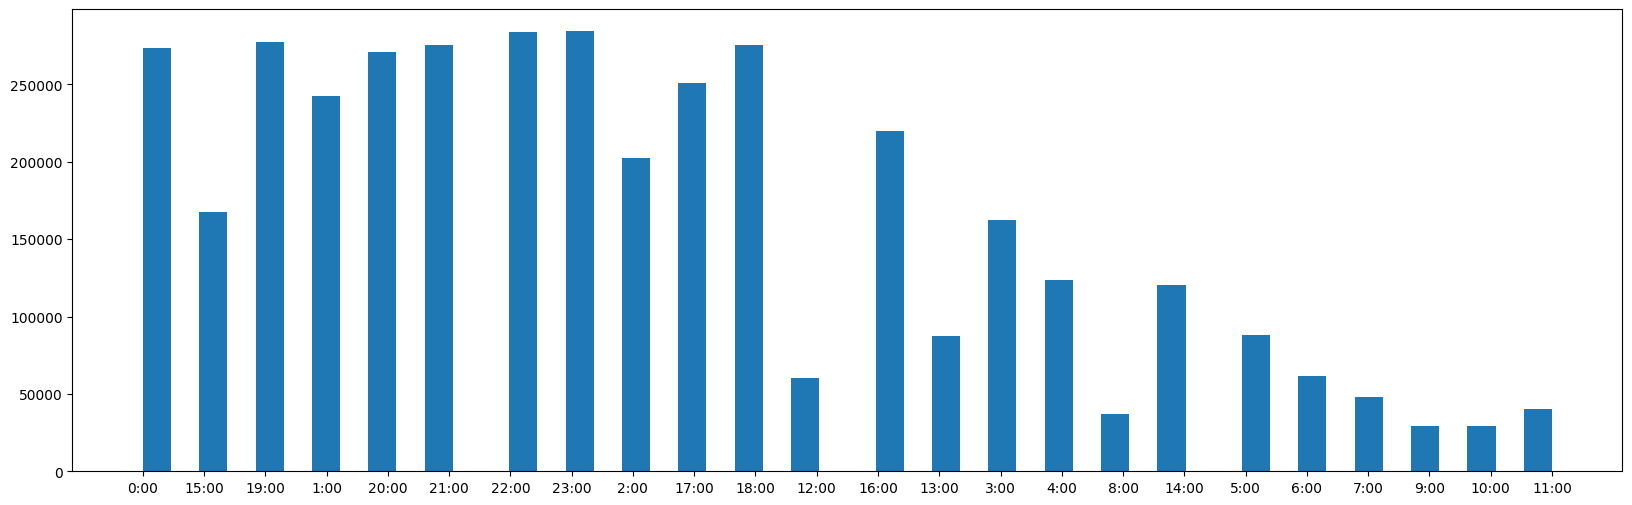

In [ ]:
checkin_cleaned_df
plt.figure(figsize=(20, 6))
plt.hist(checkin_cleaned_df['hour'], bins=50)

In [ ]:
# Step 1 - using datetime functions, create a column called 'Time of Day' that has the time
# (Hour:Minute) seen in the hour column
checkin_time_df = checkin_cleaned_df.copy()
# checkin_time_df['Time of Day'] = checkin_time_df['hour'].dt.strftime('%H:%M')
checkin_time_df['Time of Day'] = checkin_time_df['hour']
checkin_time_df

# HINT: The date should be of type %H:%M, and once you've converted to datetime
# you can use the .time() function to get the time of day (NOTE: there are multiple ways to do this so do not worry if your approach is different)


,business_id,weekday,hour,checkins,Time of Day
0,--6MefnULPED_I942VcFNA,Fri,0:00,2,0:00
1,--6MefnULPED_I942VcFNA,Fri,15:00,1,15:00
2,--6MefnULPED_I942VcFNA,Fri,19:00,1,19:00
3,--6MefnULPED_I942VcFNA,Fri,1:00,3,1:00
4,--6MefnULPED_I942VcFNA,Fri,20:00,3,20:00
...,...,...,...,...,...
3911213,zzzaIBwimxVej4tY6qFOUQ,Wed,20:00,1,20:00
3911214,zzzaIBwimxVej4tY6qFOUQ,Wed,21:00,2,21:00
3911215,zzzaIBwimxVej4tY6qFOUQ,Wed,23:00,1,23:00
3911216,zzzaIBwimxVej4tY6qFOUQ,Wed,2:00,1,2:00


In [ ]:
# Step 2 - Using the 'weekday' column, create a column called 'Day' which has the day
# associated with the date (Monday, Tuesday, ..., Sunday). You can discard the
# 'weekday' column once you're done.
dayCode = {'Mon': 'Monday', 'Tue': 'Tuesday', 'Wed':'Wednesday', 'Thu':'Thursday', 'Fri':'Friday', 'Sat':'Saturday', 'Sun':'Sunday'}
checkin_time_df['Day'] = checkin_time_df['weekday'].map(dayCode)
checkin_time_df = checkin_time_df.drop(columns=['weekday'])
checkin_time_df

# Hint: You can try to come up with a way to map an abbreviated word to its full word.

# Mon represents Monday, Tue represents Tuesday, ... , Sun represents Sunday

# Use a lambda function to apply the mapping



,business_id,hour,checkins,Time of Day,Day
0,--6MefnULPED_I942VcFNA,0:00,2,0:00,Friday
1,--6MefnULPED_I942VcFNA,15:00,1,15:00,Friday
2,--6MefnULPED_I942VcFNA,19:00,1,19:00,Friday
3,--6MefnULPED_I942VcFNA,1:00,3,1:00,Friday
4,--6MefnULPED_I942VcFNA,20:00,3,20:00,Friday
...,...,...,...,...,...
3911213,zzzaIBwimxVej4tY6qFOUQ,20:00,1,20:00,Wednesday
3911214,zzzaIBwimxVej4tY6qFOUQ,21:00,2,21:00,Wednesday
3911215,zzzaIBwimxVej4tY6qFOUQ,23:00,1,23:00,Wednesday
3911216,zzzaIBwimxVej4tY6qFOUQ,2:00,1,2:00,Wednesday


In [ ]:
# Step 3 - Make a dataframe that just contains 'business_id', 'checkins', 'Time of Day', and 'Day'
checkin_time_df = checkin_time_df[['business_id', 'checkins', 'Time of Day', 'Day']]
checkin_time_df

,business_id,checkins,Time of Day,Day
0,--6MefnULPED_I942VcFNA,2,0:00,Friday
1,--6MefnULPED_I942VcFNA,1,15:00,Friday
2,--6MefnULPED_I942VcFNA,1,19:00,Friday
3,--6MefnULPED_I942VcFNA,3,1:00,Friday
4,--6MefnULPED_I942VcFNA,3,20:00,Friday
...,...,...,...,...
3911213,zzzaIBwimxVej4tY6qFOUQ,1,20:00,Wednesday
3911214,zzzaIBwimxVej4tY6qFOUQ,2,21:00,Wednesday
3911215,zzzaIBwimxVej4tY6qFOUQ,1,23:00,Wednesday
3911216,zzzaIBwimxVej4tY6qFOUQ,1,2:00,Wednesday


Your dataset is now complete! For the first line plot, you will be visualizing the number of trips that occur during each hour of the day, for all 7 days. To do so, you will be creating 2 line charts using Seaborn (sns).

### This is important: using only Matplotlib will NOT result in full credit

It is crucial that **your first line graph** contains the following features:
1. The X-axis should be labelled "Time of Day", is of type datetime and ranges from 00:00 (midnight) to 23:00 (11 pm)
2. The Y-axis should be labelled "Average Checkins".
3. There should be a title called "Average Checkins of Restaurants for each Hour of Day"
4. There are 7 lines for each day of the week, clearly labeled and differentiated, **containing markers**.
5. Again, must be completed using Seaborn (sns)


Text(0.5, 1.0, 'Average Checkins of Restaurants for each Hour of Day')

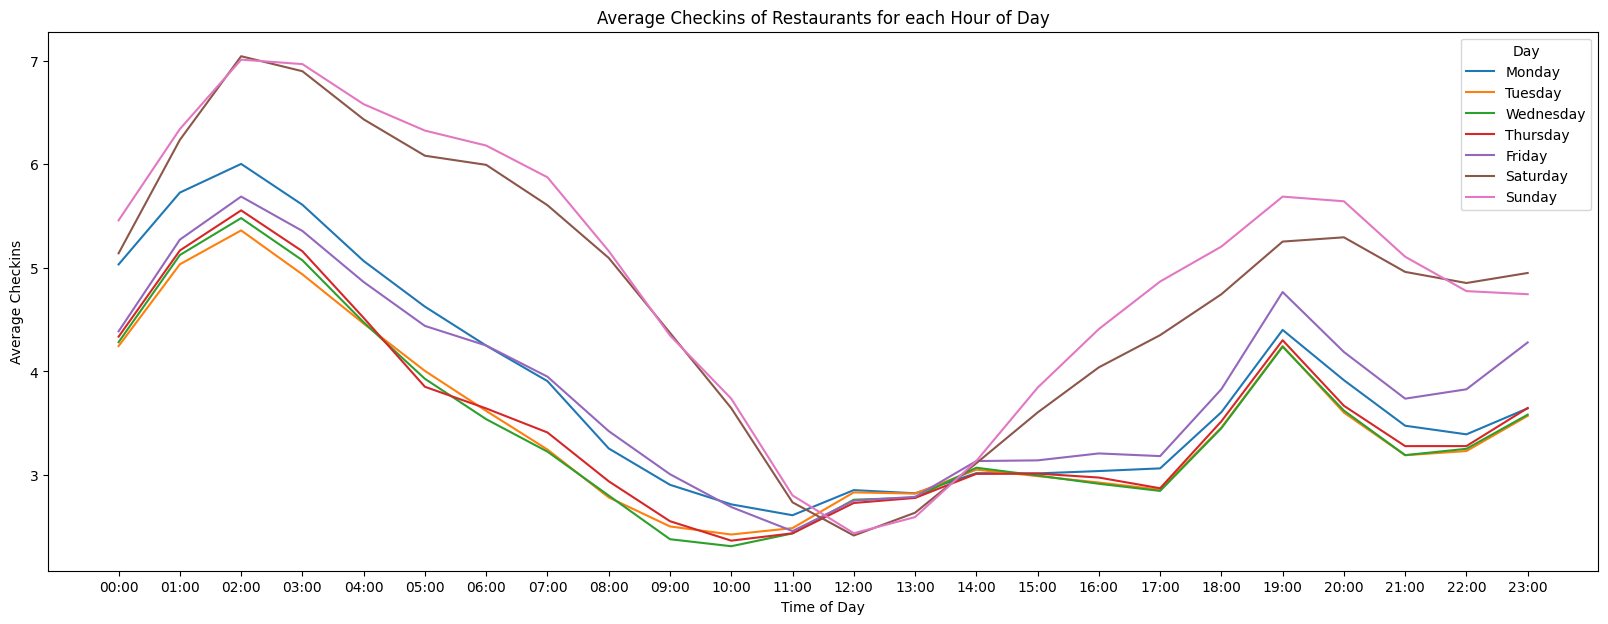

In [ ]:
# First Plot:

# Use the dataframe you generated from the previous step
plot1_df = checkin_time_df.copy()
plot1_df = plot1_df[['Day', 'Time of Day', 'checkins']]
plot1_df = plot1_df.groupby(['Day', 'Time of Day']).agg({'checkins': 'mean'}).reset_index()
plot1_df['Time of Day'] = pd.to_datetime(plot1_df['Time of Day'], format='%H:%M').dt.strftime('%H:%M')

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plot1_df['Day'] = pd.Categorical(plot1_df['Day'], categories=days, ordered=True)
plot1_df = plot1_df.sort_values(by=['Time of Day'], ascending=[True])
# Now, alter this dataframe to have 3 columns, IN THIS ORDER:
plot1_df = plot1_df[['Day', 'Time of Day', 'checkins']]
# 'day', 'Time of Day', 'Average Checkins'. Average Checkins is the mean checkins
plot1_df = plot1_df.rename(columns={'checkins': 'Average Checkins'})
# for the particular hour of that day.
# Now just plot the graph
plt.figure(figsize=(20, 7))
sns.lineplot(data=plot1_df, x='Time of Day', y='Average Checkins', hue='Day')
plt.xticks(range(0, 24))
plt.xlabel('Time of Day')
plt.ylabel('Average Checkins')
plt.title('Average Checkins of Restaurants for each Hour of Day')



Now merge with `checkins2` with `business_cleaned_df` to find the average of checkins each hours of day (`Time of Day`) to visit the American restaurant. `checkins2` refers to the dataframe that you cleaned above to complete 3.1.

For this part, you will need to clean `business_cleaned_df` to keep stores that are restaurant and category is American (New).

As a reminder, **your second line graph** should contain the following features:
1. The X-axis should be the same as last time
2. The Y-axis should be labelled "Average Checkins".
3. There should be a title called "Average Checkins of American (New) Restaurants for each Hour of Day"
4. There are 7 lines for each of the 7 days

Hint: Again, make sure you are only considering restaurants

<ipython-input-96-c73ff553b7cd>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot2_df['Time of Day'] = pd.to_datetime(plot2_df['Time of Day'], format='%H:%M').dt.strftime('%H:%M')


Text(0.5, 1.0, 'Average Checkins of American (New) Restaurants for each Hour of Day')

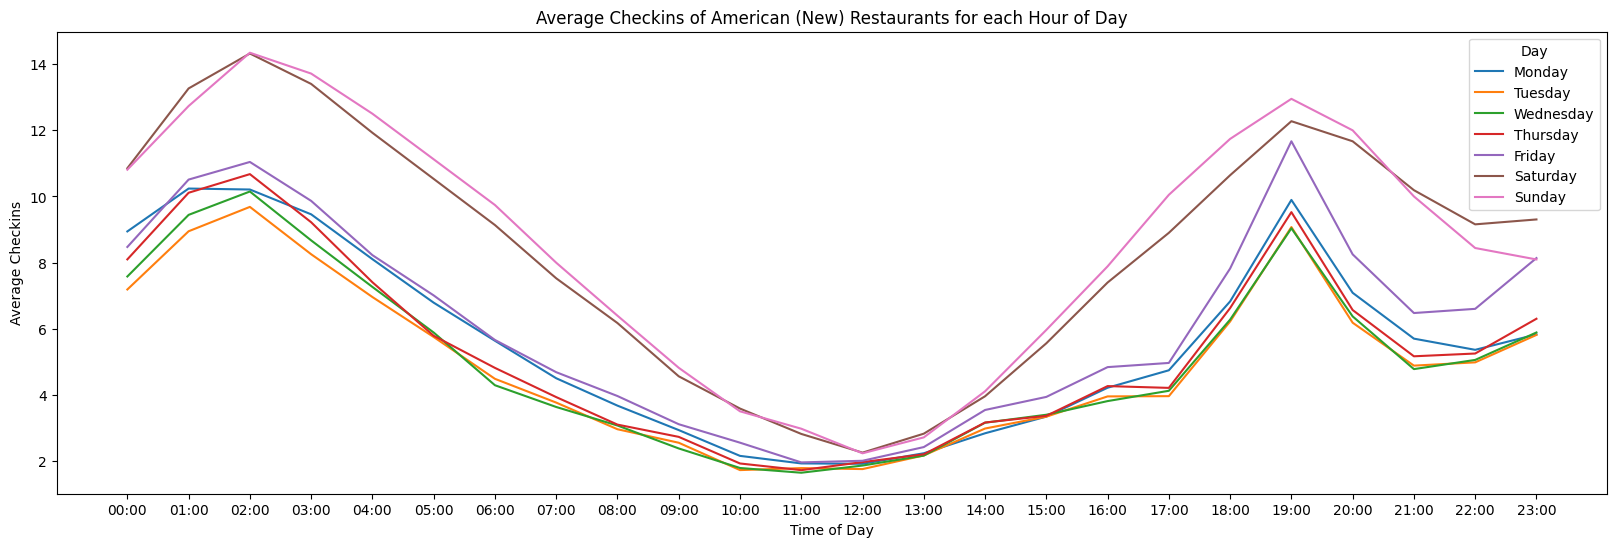

In [ ]:
# Second Plot:
business_r_df = business_cleaned_df[(business_cleaned_df['is_restaurant'] == 1) & (business_cleaned_df['categories'] == 'American (New)')]
business_r_df = checkin_time_df.merge(business_r_df, on='business_id', how='inner')

# Apply the filter for is_restaurant and categories
# Now, alter this dataframe to have 3 columns, IN THIS ORDER:
# 'day', 'Time of Day', 'Average Checkins'. Average Checkins is the mean checkins
# for the particular hour of that day.
plot2_df = business_r_df[['Day', 'Time of Day', 'checkins']]
plot2_df['Time of Day'] = pd.to_datetime(plot2_df['Time of Day'], format='%H:%M').dt.strftime('%H:%M')
plot2_df = plot2_df.groupby(['Day', 'Time of Day']).agg({'checkins': 'mean'}).reset_index()
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plot2_df['Day'] = pd.Categorical(plot2_df['Day'], categories=days, ordered=True)
plot2_df = plot2_df.sort_values(by=['Time of Day'], ascending=[True])
plot2_df = plot2_df.rename(columns={'checkins': 'Average Checkins'})
plot2_df
# Now just plot the graph
plt.figure(figsize=(20, 6))
sns.lineplot(data=plot2_df, x='Time of Day', y='Average Checkins', hue='Day')
plt.xticks(range(0, 24))
plt.title('Average Checkins of Time of Day for American (New) Restaurants')

## Part 4: Working with Text Data [8 points]

Now, let's switch gears and try to text-based analysis. Textual data is complex, but can also be used to generate extremely interpretable results, making it both valuable and interesting.

Throughout this section, we will attempt to answer the following question:

**According to the `hotels_df` dataframe, what do the reviews for some of the most popular hotels in Europe look like?**

In [ ]:
# loading the dataset
hotels_df = pd.read_csv('hotel_reviews.csv')
hotels_df.rename(columns={'Review_Total_Positive_Word_Counts':'reviews'}, inplace=True)

### 4.1 Tokenizing the text [2 points]

We are going to split the contents of the `reviews` column from `hotels_df` into a list of words. We will use the **nltk** library, which contains an extensive set of tools for text processing. Now, this homework would be interminably long if we went into all the details of nltk. Thus, we are only going to use the following components of the library:
- `nltk.word_tokenize()`: a function used to tokenize text
- `nltk.corpus.stopwords`: a list of commonly used words such as "a", "an","in" that are often ignored in text analysis

Note that for this question, we didn't have to clean the text data first as our original dataset was well-formatted. However, in practice, we would typically clean the text first using regular expressions (regex). Keep this in mind as you work on the project later on in the semester.

**TODO:** Perform the following tasks:
- Use **nltk.corpus.stopwords** to create a set containing the most common English stopwords.
- Implement the function **tokenized_content(content)**, which takes in a string and does the following:
1. Tokenize the text
2. Keep tokens that only contain alphabetic characters (i.e. tokens with no punctuation)
3. Convert each token to lowercase
4. Remove stopwords (commonly used words such as "a", "an", "in")


In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [107]:
# TODO: tokenize and flatten
# (create a tokenized_content function that performs the steps listed above)

def tokenized_content(content):
    tokens = nltk.word_tokenize(content)
    tokens = [token for token in tokens if token.isalpha()]
    tokens = [token.lower() for token in tokens]
    tokens = [token for token in tokens if token not in stopwords]
    return tokens

**TODO**: Now perform the following tasks:
- We are interested in reviews for the **most reviewed** hotel in `hotels_df`. Using Counter() to find this hotel is recommended. Store the name of the hotel in the `most_reviewed_hotel` variable, and use it to create `hotel_reviews_df`, a subset of `hotels_df` only containing instances from the hotel in question.
- The `most_reviewed_hotel` is calculated based on how many times the name of hotel showed up in the dataset.
- From there, extract the `Positive_Review` column of `hotels_reviews_df` as a list called `reviews`.
- Apply your `tokenize_content()` function to each item in the list `reviews`. Call the resultant list `top_tokens_list`.
- Flatten the list `top_tokens_list`, and call the resultant list `top_tokens`. The autograder will be examining the contents of this list. (Flatten using list comprehension)

For futher assistance, here is the documentation for Counter() objects:

https://docs.python.org/2/library/collections.html#counter-objects

In [108]:
from collections import Counter
# TODO: Find the most reviewed hotel, use that to make hotel_reviews_df,
#       extract the reviews, use your function to make the token list, and flatten it

most_reviewed_hotel = Counter(hotels_df['Hotel_Name']).most_common(1)[0][0]
hotel_reviews_df = hotels_df[hotels_df['Hotel_Name'] == most_reviewed_hotel]
reviews = hotel_reviews_df['Positive_Review'].tolist()
top_tokens_list = [tokenized_content(review) for review in reviews]
top_tokens = [token for sublist in top_tokens_list for token in sublist]

In [109]:
# 2 points
grader.grade(test_case_id = 'test_top_tokens', answer = top_tokens)

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.



### 4.2 Most Frequent Words [2 points]
**TODO**: Now, find the 10 most common words amongst the content of `top_tokens`. Return this as a list of `(word, count)` tuples called `top_most_common`, in descending order of `count`.

**Hint**: We again recommend using `Counter` in this question.

In [110]:
# TODO: Get top_most_common
top_most_common = Counter(top_tokens).most_common(10)

In [ ]:
# 2 points
grader.grade(test_case_id = 'test_top_most_common', answer = top_most_common)

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### 4.3 Word Clouds [4 points - manually graded]

Before we move on from this dataset, let's visualize our results using a word cloud.

**TODO**: Create a word cloud containing all the words in the list `top_tokens` (created in part 4.1). [The WordCloud documentation](https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html) contains instructions on how to do this.

*Please make sure your wordcloud has a **lavender** background.*

We will be going through your notebooks and **manually grading** your word cloud. This is worth 4 points.

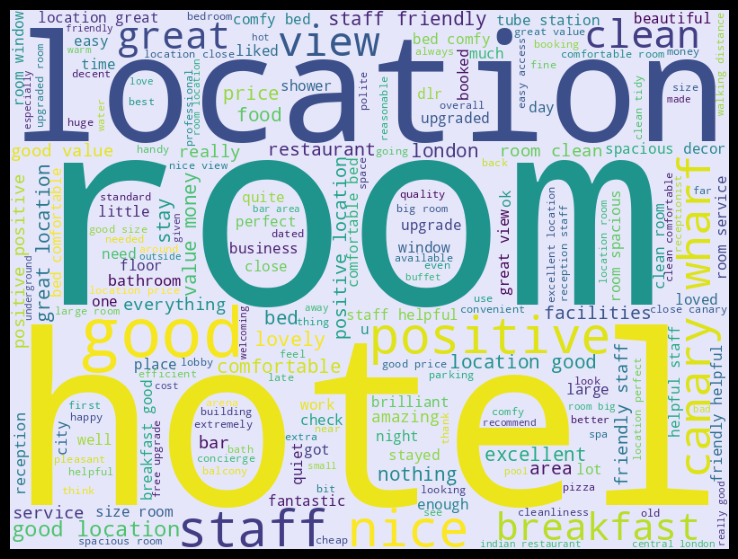

In [119]:
# TODO: Generate your Word Cloud, making sure it meets the requirements above
words = ' '.join(top_tokens)
wordcloud = WordCloud(background_color='lavender', width=800, height= 600).generate(words)
plt.figure(figsize=(10, 7), facecolor='k')
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# HW Submission

<br>
<center><img src = "https://i.imgflip.com/79knab.jpg" width= "500" align ="center"/></center>
<br>

Congratulations on finishing this homework! The good news is that similar to HW1, you basically know your score when you submit to Gradescope.
However, this time, we will be manually grading your lineplots and wordclouds, so the autograder score is not final! Remember that we will also be checking for plagiarism, so please make sure to cite your sources (if any) by commenting the urls / links you looked at.

Before you submit on Gradescope (you must submit your notebook to receive credit):

1.   Please rerun your notebook on Colab by clicking "Restart and Run-All", and make sure there is nothing wrong with your notebook.
2.   **Double check that you have the correct PennID (all numbers) saved in the autograder**.
3. Make sure you've run all the PennGrader cells and have received a score.
4. Go to the "File" tab at the top left, and click "Download .ipynb" + "Download .py". Please name the `.ipynb` and `.py` files **"homework2.ipynb"** and **"homework2.py"** respectively. Then, upload both the `.py` and `.ipynb` files to Gradescope.

###Be sure to name your files correctly!!!

**Please let the course staff know ASAP if you have any issues submitting.**